In [1]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression


In [2]:
# take consomaion data
df = pd.read_excel("Data/conso_clean.xlsx")
df

,Mois,Territoire,Consommation totale
0,2012-01,France,51086
1,2012-02,France,54476
2,2012-03,France,43156
3,2012-04,France,40176
4,2012-05,France,35257
...,...,...,...
1398,2021-11,Occitanie,3581
1399,2021-11,Normandie,2528
1400,2021-11,Hauts-de-France,4593
1401,2021-11,PACA,3561


In [3]:
# select french territory
consommation_france=df.loc[df['Territoire']=='France',['Mois','Consommation totale']]

# transform mois to data time format
consommation_france['Mois']=pd.to_datetime(consommation_france["Mois"])

# delete negative or null values
consommation_france=consommation_france.loc[consommation_france['Consommation totale']>0,:]

# rename column
consommation_france=consommation_france.rename(columns={'Consommation totale': 'Conso_totale'})

consommation_france

,Mois,Conso_totale
0,2012-01-01,51086
1,2012-02-01,54476
2,2012-03-01,43156
3,2012-04-01,40176
4,2012-05-01,35257
...,...,...
1344,2021-07-01,32959
1357,2021-08-01,31184
1370,2021-09-01,32350
1383,2021-10-01,36762


In [4]:
# take info to see format and if they are missing values
consommation_france.info()
# no missing value

consommation_france["Mois"] = pd.to_datetime(consommation_france['Mois'],format='%m/%d/%y %I:%M%p')

consommation_france["Year"] = consommation_france["Mois"].dt.year
print("sum")
print(consommation_france.groupby(consommation_france['Year']).sum())
print("mean")
print(consommation_france.groupby(consommation_france['Year']).mean())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 1396
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Mois          119 non-null    datetime64[ns]
 1   Conso_totale  119 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB
sum
      Conso_totale   Year
Year                     
2012        489517  24144
2013        494842  24156
2014        465150  24168
2015        476050  24180
2016        483219  24192
2017        482008  24204
2018        478431  24216
2019        473401  24228
2020        449005  24240
2021        422419  22231
mean
      Conso_totale
Year              
2012  40793.083333
2013  41236.833333
2014  38762.500000
2015  39670.833333
2016  40268.250000
2017  40167.333333
2018  39869.250000
2019  39450.083333
2020  37417.083333
2021  38401.727273


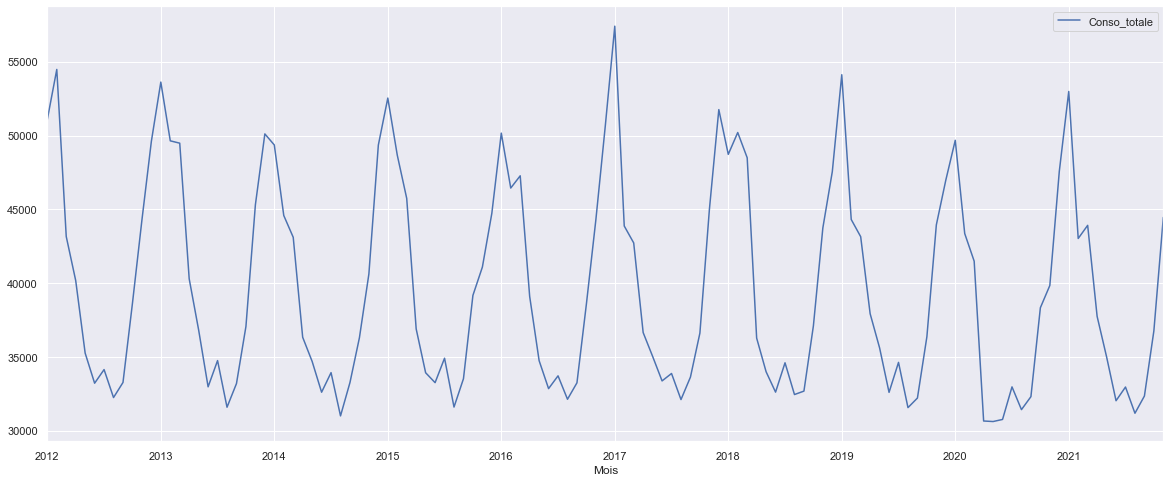

In [5]:
# display consommation in times
sns.set(rc={'figure.figsize':(20, 8)})
consommation_france.plot(y="Conso_totale",x='Mois')

In [6]:
# take meteo data
meteo=pd.read_excel('Data/calcul_DJU_clim_Paris.xlsx',skiprows=11)


meteo

,Unnamed: 0,JAN,FÉV,MAR,AVR,MAI,JUN,JUI,AOÛ,SEP,OCT,NOV,DÉC,Total
0,2021,0,0.5,5.7,4.9,13.9,54.1,0.0,0.0,0.0,0.0,0.0,0,79.2
1,2020,0,0.0,0.6,35.7,48.8,74.6,112.2,165.1,84.1,1.4,0.5,0,523.1
2,2019,0,0.5,1.2,14.5,12.0,111.3,162.3,125.7,41.2,7.2,0.0,0,476.1
3,2018,0,0.0,0.1,25.3,61.1,86.7,200.3,136.5,52.6,28.0,0.3,0,590.7
4,2017,0,0.0,2.8,4.5,60.0,123.9,120.8,94.5,20.3,12.7,0.0,0,439.5
5,2016,0,0.0,0.0,2.0,21.1,50.3,114.6,132.0,74.8,1.4,0.0,0,396.1
6,2015,0,0.0,0.3,15.8,16.1,85.4,148.1,132.4,10.9,2.8,2.2,0,413.9
7,2014,0,0.0,2.7,6.3,14.4,59.5,110.4,52.4,64.2,16.1,0.7,0,326.7
8,2013,0,0.0,0.0,10.6,3.2,43.9,160.8,104.1,40.9,11.2,0.0,0,374.7
9,2012,0,0.0,8.6,1.0,40.6,41.0,77.8,129.6,35.0,6.0,0.0,0,339.5


In [7]:
meteo=meteo.drop(columns=['Total'])


In [8]:
meteo=meteo.rename(columns={"Unnamed: 0": "Année",
                      "JAN": "01",
                      "FÉV":"02",
                      "MAR":"03",
                      "AVR":"04",
                      "MAI":"05",
                      "JUN":"06",
                      "JUI":"07",
                      "AOÛ":"08",
                      "SEP":"09",
                      "OCT":"10",
                      "NOV":"11",
                      "DÉC":"12"})
meteo = meteo.set_index("Année")

meteo

,01,02,03,04,05,06,07,08,09,10,11,12
Année,,,,,,,,,,,,
2021,0,0.5,5.7,4.9,13.9,54.1,0.0,0.0,0.0,0.0,0.0,0
2020,0,0.0,0.6,35.7,48.8,74.6,112.2,165.1,84.1,1.4,0.5,0
2019,0,0.5,1.2,14.5,12.0,111.3,162.3,125.7,41.2,7.2,0.0,0
2018,0,0.0,0.1,25.3,61.1,86.7,200.3,136.5,52.6,28.0,0.3,0
2017,0,0.0,2.8,4.5,60.0,123.9,120.8,94.5,20.3,12.7,0.0,0
2016,0,0.0,0.0,2.0,21.1,50.3,114.6,132.0,74.8,1.4,0.0,0
2015,0,0.0,0.3,15.8,16.1,85.4,148.1,132.4,10.9,2.8,2.2,0
2014,0,0.0,2.7,6.3,14.4,59.5,110.4,52.4,64.2,16.1,0.7,0
2013,0,0.0,0.0,10.6,3.2,43.9,160.8,104.1,40.9,11.2,0.0,0


In [9]:
meteo_newformat={'mois':[],'climatisation':[]}

for Année in meteo.index.values:
    for mois in meteo.columns:
        meteo_newformat['mois'].append(f"{Année}-{mois}-01")
        meteo_newformat['climatisation'].append(meteo.loc[Année,mois])
        
meteo_newformat=pd.DataFrame(meteo_newformat)
meteo_newformat['mois']=pd.to_datetime(meteo_newformat['mois'])

meteo_newformat

,mois,climatisation
0,2021-01-01,0.0
1,2021-02-01,0.5
2,2021-03-01,5.7
3,2021-04-01,4.9
4,2021-05-01,13.9
...,...,...
151,2009-08-01,128.7
152,2009-09-01,35.5
153,2009-10-01,7.9
154,2009-11-01,0.1


### Chauffage 

In [10]:
# take meteo data
meteo_chau=pd.read_excel('Data/calcul_DJU_chau_Paris.xlsx',skiprows=11)


meteo_chau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  13 non-null     int64  
 1   JAN         13 non-null     float64
 2   FÉV         13 non-null     float64
 3   MAR         13 non-null     float64
 4   AVR         13 non-null     float64
 5   MAI         13 non-null     float64
 6   JUN         13 non-null     float64
 7   JUI         13 non-null     float64
 8   AOÛ         13 non-null     float64
 9   SEP         13 non-null     float64
 10  OCT         13 non-null     float64
 11  NOV         13 non-null     float64
 12  DÉC         13 non-null     float64
 13  Total       13 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 1.5 KB


In [11]:
meteo_chau=meteo_chau.drop(columns=['Total'])


In [12]:
meteo_chau=meteo_chau.rename(columns={"Unnamed: 0": "Année",
                      "JAN": "01",
                      "FÉV":"02",
                      "MAR":"03",
                      "AVR":"04",
                      "MAI":"05",
                      "JUN":"06",
                      "JUI":"07",
                      "AOÛ":"08",
                      "SEP":"09",
                      "OCT":"10",
                      "NOV":"11",
                      "DÉC":"12"})
meteo_chau = meteo_chau.set_index("Année")

meteo_chau

,01,02,03,04,05,06,07,08,09,10,11,12
Année,,,,,,,,,,,,
2021,396.7,303.3,276.5,232.2,147.1,7.9,0.0,0.0,0.0,0.0,0.0,0.0
2020,339.0,249.6,269.2,105.6,85.9,37.7,16.5,12.6,46.1,158.9,227.7,336.8
2019,404.9,268.8,234.3,177.2,126.8,35.7,10.0,11.8,45.3,136.9,282.6,327.3
2018,303.4,432.6,314.4,128.9,74.1,20.1,1.6,13.5,53.7,133.4,282.8,325.9
2017,467.9,278.4,208.9,187.1,87.8,21.4,13.5,20.8,74.5,109.3,282.6,369.0
2016,364.4,321.6,321.1,214.1,100.7,40.8,14.7,13.8,27.3,177.3,285.6,390.8
2015,392.0,365.7,275.7,154.6,104.8,36.4,15.8,16.1,81.8,179.6,196.9,248.1
2014,324.4,281.9,226.6,141.8,112.5,37.3,17.7,36.1,34.4,101.3,223.3,368.2
2013,429.2,402.2,376.6,216.3,161.5,57.6,9.3,19.9,55.3,112.0,303.9,349.5


In [13]:
meteo_chau_newformat={'mois':[],'chauffage':[]}

for Année in meteo_chau.index.values:
    for mois in meteo_chau.columns:
        meteo_chau_newformat['mois'].append(f"{Année}-{mois}-01")
        meteo_chau_newformat['chauffage'].append(meteo_chau.loc[Année,mois])
        
meteo_chau_newformat=pd.DataFrame(meteo_chau_newformat)
meteo_chau_newformat['mois']=pd.to_datetime(meteo_chau_newformat['mois'])

meteo_chau_newformat

,mois,chauffage
0,2021-01-01,396.7
1,2021-02-01,303.3
2,2021-03-01,276.5
3,2021-04-01,232.2
4,2021-05-01,147.1
...,...,...
151,2009-08-01,11.8
152,2009-09-01,47.2
153,2009-10-01,152.7
154,2009-11-01,224.8


### DJU


In [14]:
dju=meteo_newformat.merge(meteo_chau_newformat,on='mois',how='inner')
dju['dju']=dju['chauffage']+dju['climatisation']
dju.head(60)



,mois,climatisation,chauffage,dju
0,2021-01-01,0.0,396.7,396.7
1,2021-02-01,0.5,303.3,303.8
2,2021-03-01,5.7,276.5,282.2
3,2021-04-01,4.9,232.2,237.1
4,2021-05-01,13.9,147.1,161.0
5,2021-06-01,54.1,7.9,62.0
6,2021-07-01,0.0,0.0,0.0
7,2021-08-01,0.0,0.0,0.0
8,2021-09-01,0.0,0.0,0.0
9,2021-10-01,0.0,0.0,0.0


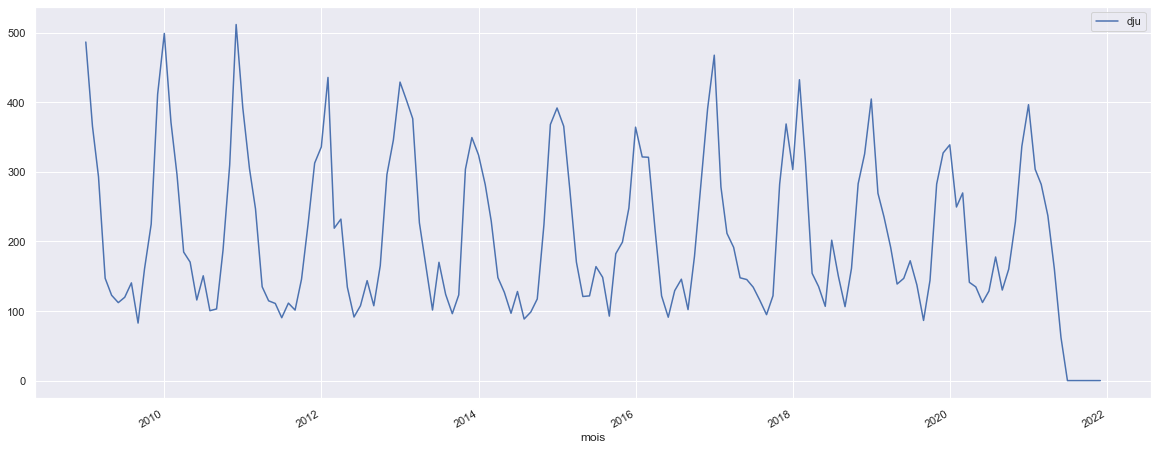

In [15]:
dju.plot(y="dju",x='mois')

In [16]:
# link data consomation with dju
df=consommation_france.merge(dju,left_on='Mois',right_on='mois')

# delete 5 last raws
df = df[:-5]

df = df.set_index("Mois")

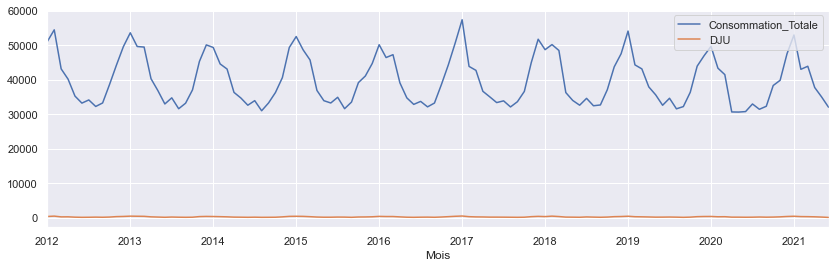

In [17]:
# display conso & DJU
df['Conso_totale'].plot(figsize=(14,4),label="Consommation_Totale")
df['dju'].plot(figsize=(14,4),label="DJU")
plt.legend()

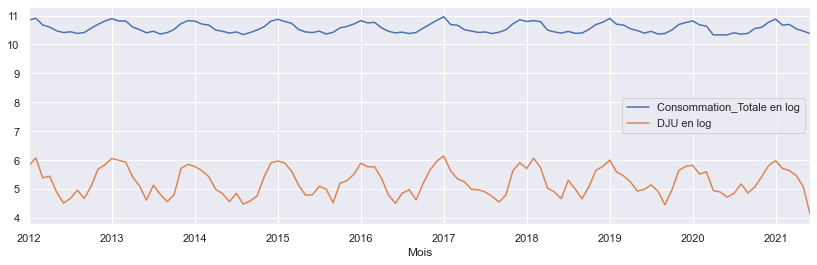

In [18]:
# display log conso and DJU
np.log(df['Conso_totale']).plot(figsize=(14,4),label="Consommation_Totale en log")
np.log(df['dju']).plot(figsize=(14,4),label="DJU en log")
plt.legend()

## désaisonalisation avec regression linéaire

In [19]:
df['t']=range(1, df.shape[0]+1)
y=df['Conso_totale']
x=df[['dju']]
x

,dju
Mois,
2012-01-01,336.0
2012-02-01,435.9
2012-03-01,219.1
2012-04-01,232.2
2012-05-01,134.4
...,...
2021-02-01,303.8
2021-03-01,282.2
2021-04-01,237.1


In [20]:
from sklearn import linear_model

reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(x, y)
regression=reg.fit(x, y)
regression

LinearRegression()

In [21]:
print(reg.coef_,reg.intercept_)
c = reg.coef_[0]
serie_corrigee = df['Conso_totale'] - df['dju']*c

[66.74926459] 25452.86105647532


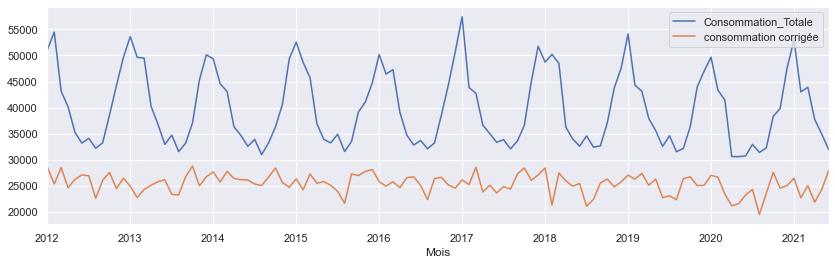

In [22]:
df['Conso_totale'].plot(figsize=(14,4),label="Consommation_Totale")
serie_corrigee.plot(label='consommation corrigée')
plt.legend()

## statmodel

In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

reg_multip = smf.ols('Conso_totale ~ dju', data=df).fit()

In [24]:
print(reg_multip.summary())

                            OLS Regression Results                            
Dep. Variable:           Conso_totale   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1470.
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           3.16e-66
Time:                        13:49:38   Log-Likelihood:                -1020.9
No. Observations:                 114   AIC:                             2046.
Df Residuals:                     112   BIC:                             2051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.545e+04    413.917     61.493      0.0

In [25]:
serie_corr_df = pd.DataFrame({'Mois':serie_corrigee.index, 'corrigee':serie_corrigee.values})

serie_corr_df

,Mois,corrigee
0,2012-01-01,28658.247099
1,2012-02-01,25379.995567
2,2012-03-01,28531.236129
3,2012-04-01,24676.820763
4,2012-05-01,26285.898840
...,...,...
109,2021-02-01,22745.573419
110,2021-03-01,25076.357534
111,2021-04-01,21920.749367
112,2021-05-01,24260.368402


In [26]:
from scipy.stats import shapiro
shapiro(reg_multip.resid)

ShapiroResult(statistic=0.9714349508285522, pvalue=0.015292173251509666)

[('Lagrande multiplier statistic', 0.710917118466428), ('p-value', 0.3991395188336555), ('f-value', 0.7028278033771442), ('f p-value', 0.40362076136675584)]
Shapiro pvalue : 0.015292825177311897


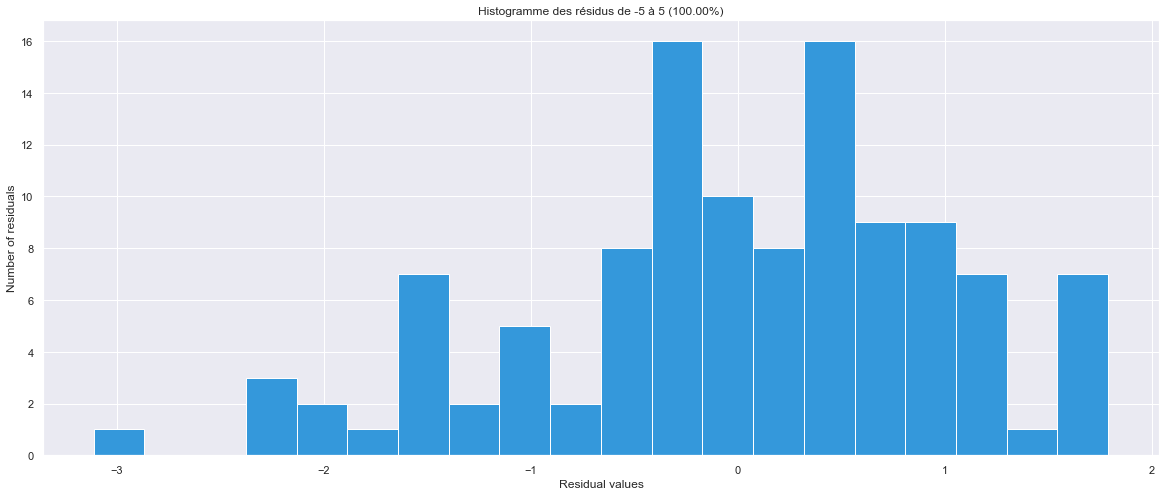

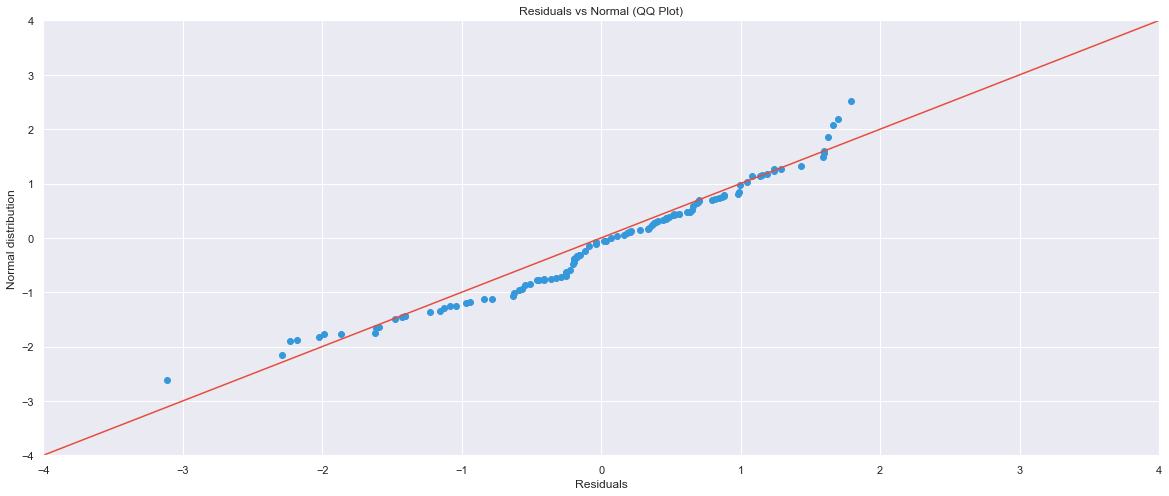

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats import outliers_influence
from statsmodels.compat import lzip

#from descstats import MyPlot, Univa

import warnings
warnings.filterwarnings(action="ignore", module="sklearn", message="^internal gelsd")

###############################################################
# Linear Regression Analysis
###############################################################

def linear_regression_analysis(linear_regression):
    """ Compute and plot a complete analysis of a linear regression computed with Stats Models.
    Args:
         linear_regression (Stats Models Results): the result obtained  with Stats Models.

    """

    # Data
    resid = linear_regression.resid_pearson.copy()
    resid_index = linear_regression.resid.index
    exog = linear_regression.model.exog
    endog = linear_regression.model.endog
    fitted_values = linear_regression.fittedvalues
    influences = outliers_influence.OLSInfluence(linear_regression)

    p = exog.shape[1] # Number of features
    n = len(resid) # Number of individuals

    # Paramètres
    color1 = "#3498db"
    color2 = "#e74c3c"

    ##############################################################################
    # Tests statistiques                                                         #
    ##############################################################################

    # Homoscédasticité - Test de Breusch-Pagan
    ##########################################

    names = ['Lagrande multiplier statistic', 'p-value', 'f-value', 'f p-value']
    breusch_pagan = sm.stats.diagnostic.het_breuschpagan(resid, exog)
    print(lzip(names, breusch_pagan))

    # Test de normalité - Shapiro-Wilk
    ###################################

    print(f"Shapiro pvalue : {st.shapiro(resid)[1]}")

    ##############################################################################
    # Analyses de forme                                                          #
    ##############################################################################

    # Histogramme des résidus
    ##########################
    data = resid
    data_filter = data
#     data_filter = data[data < 5]
#     data_filter = data[data > -5]
    len_data = len(data)
    len_data_filter = len(data_filter)
    ratio = len_data_filter / len_data

    fig, ax = plt.subplots()
    plt.hist(data_filter, bins=20, color=color1)
    plt.xlabel("Residual values")
    plt.ylabel("Number of residuals")
    plt.title(f"Histogramme des résidus de -5 à 5 ({ratio:.2%})")

    # Normal distribution vs residuals (QQ Plot, droite de Henry)
    #############################################################
    data = pd.Series(resid).sort_values()
    len_data = len(data)

    normal = pd.Series(np.random.normal(size=len_data)).sort_values()
    fig, ax = plt.subplots()
    plt.scatter(data, normal, c=color1)
    plt.plot((-4,4), (-4, 4), c=color2)
    plt.xlabel("Residuals")
    plt.ylabel("Normal distribution")
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.title("Residuals vs Normal (QQ Plot)")

    
    # Plot
    plt.show()

linear_regression_analysis(reg_multip)

désaisonalisé

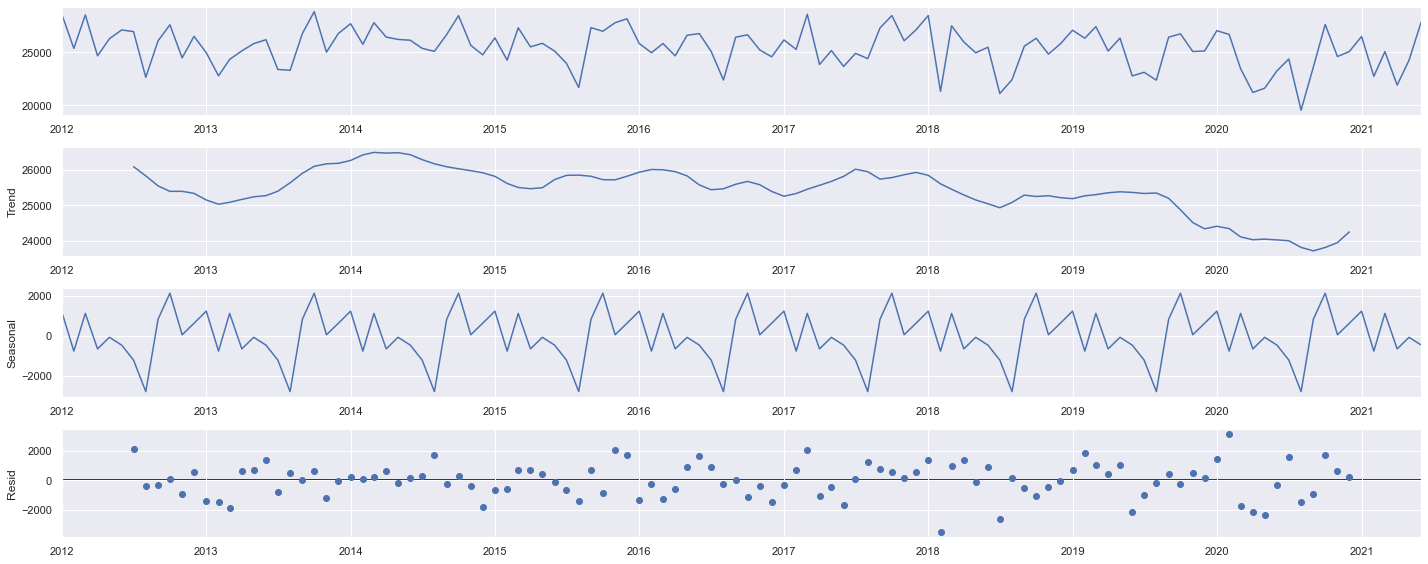

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomp_x = seasonal_decompose(serie_corrigee,  model='additive')
decomp_x.plot()
plt.show()

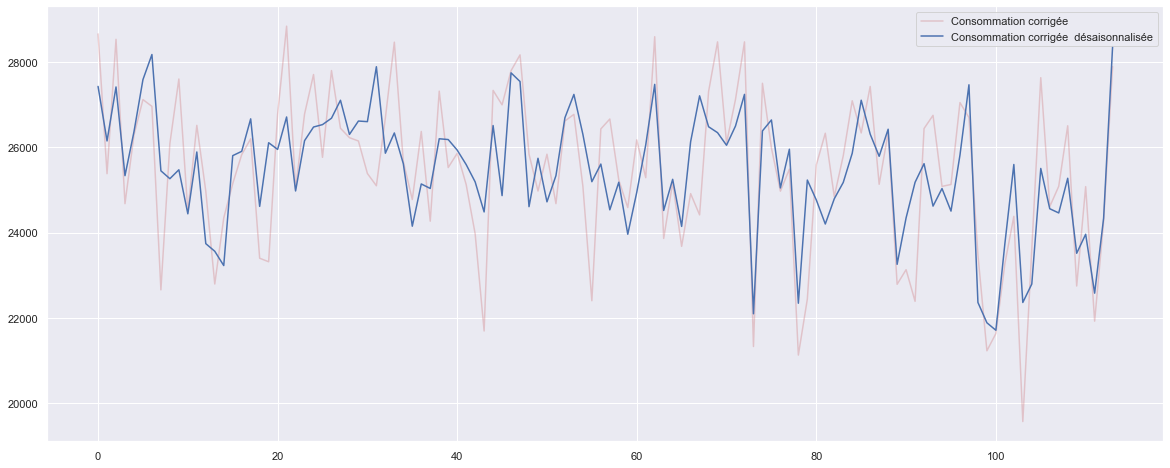

In [29]:
serie_corr_df['corrigee_desaison'] = serie_corrigee.values - decomp_x.seasonal.values
plt.plot(serie_corr_df["corrigee"],'r', label="Consommation corrigée",alpha=0.25)
plt.plot(serie_corr_df["corrigee_desaison"],'b', label="Consommation corrigée  désaisonnalisée")

plt.legend()
plt.show()

In [30]:
# Et enfin pour la méthode de Holt-Winters :


x_tronc = serie_corr_df.iloc[:-12,:]

from statsmodels.tsa.api import ExponentialSmoothing

y= np.asarray(x_tronc["corrigee"])
hw = ExponentialSmoothing(y, 
                          seasonal_periods=12, trend='add', 
                          seasonal='add').fit()
hw_pred = hw.forecast(24)

hw.params

F:\w10\Programme\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


{'smoothing_level': 0.037726661402014076,
 'smoothing_slope': 0.03772665471430324,
 'smoothing_seasonal': 0.009837052656822389,
 'damping_slope': nan,
 'initial_level': 26764.6005223432,
 'initial_slope': 0.0061241442519398195,
 'initial_seasons': array([  628.26644285, -1542.51397153,   485.91923775, -1510.15870915,
         -792.92752191, -1015.85157287, -2009.42300813, -3239.97272121,
          294.03612328,  1271.42364612,  -751.3456524 ,  -129.15946479]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

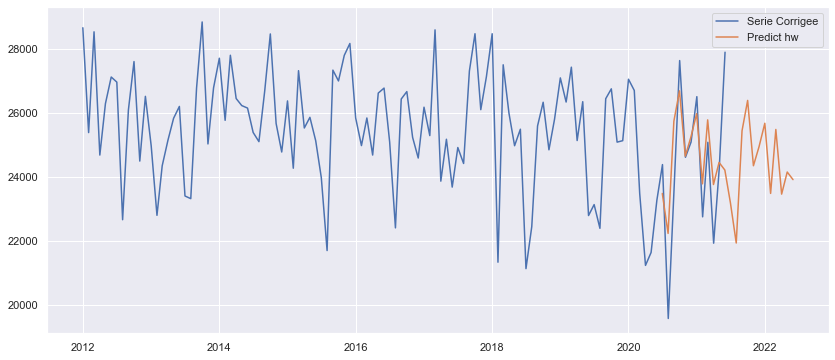

In [31]:
plt.figure(figsize=(14,6))
plt.plot(serie_corr_df['Mois'],serie_corr_df['corrigee'], label='Serie Corrigee')
plt.plot(pd.date_range(x_tronc.Mois[x_tronc.shape[0]-1],
                       periods=24, freq='M'), hw_pred, label='Predict hw')
plt.legend()
plt.show()

In [32]:
# comparaison des prédiction avec les valeur connu

x_tronc = serie_corr_df.iloc[:-48,:]
#y_tronc = np.log(x_tronc)
x_a_prevoir = serie_corr_df.iloc[-48:,:]

In [33]:
y= np.asarray(x_tronc["corrigee"])
hw = ExponentialSmoothing(y, 
                          seasonal_periods=12, trend='add', 
                          seasonal='add').fit()
hw_pred = hw.forecast(48)
hw_pred

array([24001.84619968, 22120.13455504, 25787.36926575, 26846.8002963 ,
       24800.96523632, 25324.32868573, 25524.75799656, 23739.34363498,
       26097.18144257, 24087.36033787, 25110.72934989, 24949.38672424,
       24001.86781477, 22120.15617013, 25787.39088084, 26846.82191139,
       24800.9868514 , 25324.35030082, 25524.77961164, 23739.36525007,
       26097.20305766, 24087.38195296, 25110.75096498, 24949.40833933,
       24001.88942986, 22120.17778521, 25787.41249593, 26846.84352648,
       24801.00846649, 25324.37191591, 25524.80122673, 23739.38686516,
       26097.22467275, 24087.40356804, 25110.77258007, 24949.42995441,
       24001.91104495, 22120.1994003 , 25787.43411101, 26846.86514157,
       24801.03008158, 25324.39353099, 25524.82284182, 23739.40848024,
       26097.24628784, 24087.42518313, 25110.79419515, 24949.4515695 ])

In [34]:
x_a_prevoir['prediction']=hw_pred.copy()

# moyenne des écarts entre la consomation corrigé et la prédiction
MAE=np.abs(x_a_prevoir['corrigee']-x_a_prevoir['prediction']).mean()
MAE

<ipython-input-34-79f0d368fe62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_a_prevoir['prediction']=hw_pred.copy()


1373.061178006222

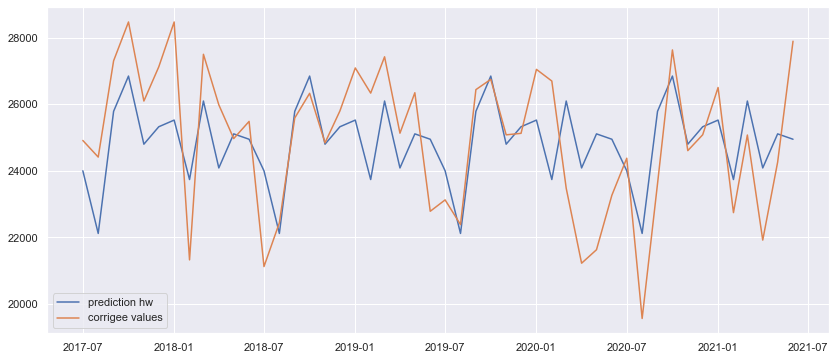

In [35]:
plt.figure(figsize=(14,6))
plt.plot(x_a_prevoir['Mois'],x_a_prevoir['prediction'], label='prediction hw')
plt.plot(x_a_prevoir['Mois'],x_a_prevoir['corrigee'], label='corrigee values')
plt.legend()

## Sarima

In [36]:
from statsmodels.tsa.stattools import adfuller, kpss #adfuller => analyse de corrélation de la série, kpss => know if serial is stationnary
from statsmodels.tsa.stattools import acf, pacf #calcul autocorrelation function, partial calcul autocorrelation


print("adfuller, analyse de corrélation de la série")
print(adfuller(serie_corr_df['corrigee'])[1])

print("kpss, tendance stationnaire")
print(kpss(serie_corr_df['corrigee'])[1])
print("p-values < 5%, donc la série est stationaire")



adfuller, analyse de corrélation de la série
0.2689949415114944
kpss, tendance stationnaire
0.033606509764225474
p-values < 5%, donc la série est stationaire


F:\w10\Programme\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


F:\w10\Programme\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


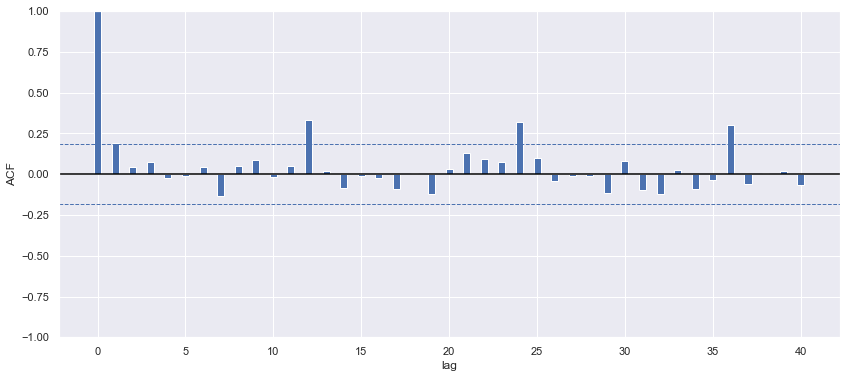

 acf trend to 0, problem of no-stationarity on the 12th month


In [37]:
# Méthode to display acf trend

def plot_sortie_acf( y_acf, y_len, pacf=False):
    "représentation de la sortie ACF"
    if pacf:
        y_acf = y_acf[1:]
    plt.figure(figsize=(14,6))
    plt.bar(range(len(y_acf)), y_acf, width = 0.4)
    plt.xlabel('lag')
    plt.ylabel('ACF')
    plt.axhline(y=0, color='black')
    plt.axhline(y=-1.96/np.sqrt(y_len), color='b', linestyle='--', linewidth=1.)
    plt.axhline(y=1.96/np.sqrt(y_len), color='b', linestyle='--', linewidth=1.)
    plt.ylim(-1, 1)
    plt.show()
    return


plot_sortie_acf(acf(np.asarray(serie_corr_df['corrigee'])), len(serie_corr_df['corrigee']), pacf=False)

print(" acf trend to 0, problem of no-stationarity on the 12th month")

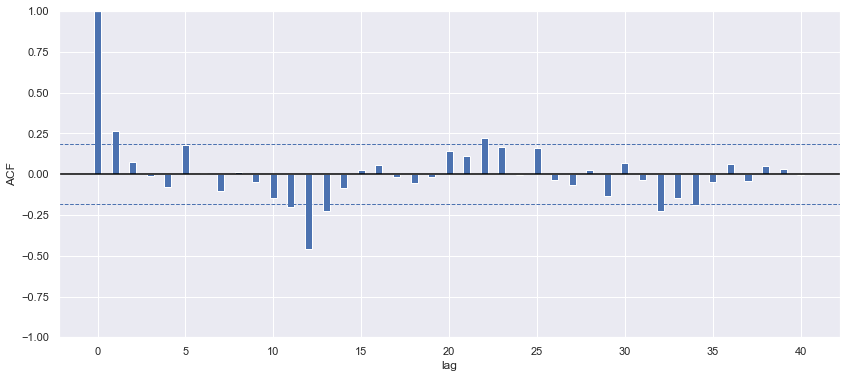

In [38]:
#  use differenciation (i - B)

serie_corr_df_diff = serie_corr_df['corrigee'] - serie_corr_df['corrigee'].shift(12)
plot_sortie_acf(acf(np.asarray(serie_corr_df_diff[13:])), len(serie_corr_df_diff), pacf=False)


8.483865990300377e-06
0.1


F:\w10\Programme\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


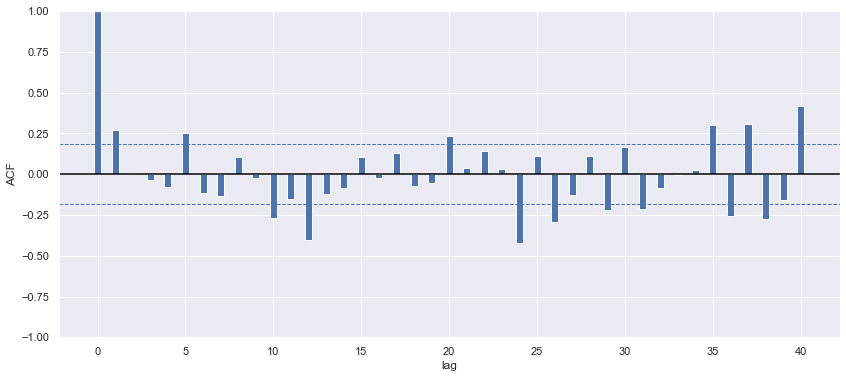

In [39]:
# serie_corr_df['corrigee']
# serie_corr_df['corrigee'].shift(12)

print(adfuller(serie_corr_df_diff[12:])[1])

print(kpss(serie_corr_df_diff[12:])[1])

plot_sortie_acf(pacf(np.asarray(serie_corr_df_diff[13:])), len(serie_corr_df_diff), pacf=False)

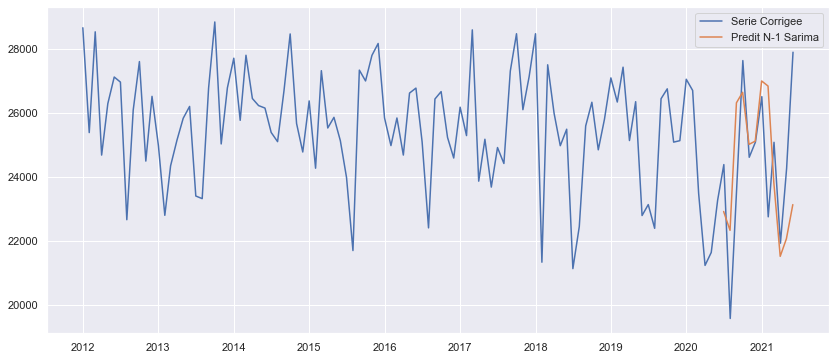

In [40]:
from statsmodels.tsa.statespace.sarimax import *

x_tronc = serie_corr_df.iloc[:-12,:]
x_tronc_t = serie_corr_df
#y_tronc = np.log(x_tronc)
x_a_prevoir = serie_corr_df.iloc[-12:,:]

model1 = SARIMAX(np.asarray(x_tronc["corrigee"]), order=(1,0,1), seasonal_order=(1,1,1,12))
results1 = model1.fit()
sarima_pred=results1.forecast(12)

plt.figure(figsize=(14,6))
plt.plot(x_tronc_t['Mois'],x_tronc_t['corrigee'], label='Serie Corrigee ')
plt.plot(pd.date_range(x_tronc.Mois[x_tronc.shape[0]-1],
                       periods=12, freq='M'), sarima_pred, label='Predit N-1 Sarima')
plt.legend()
plt.show()

1796.2086250622035

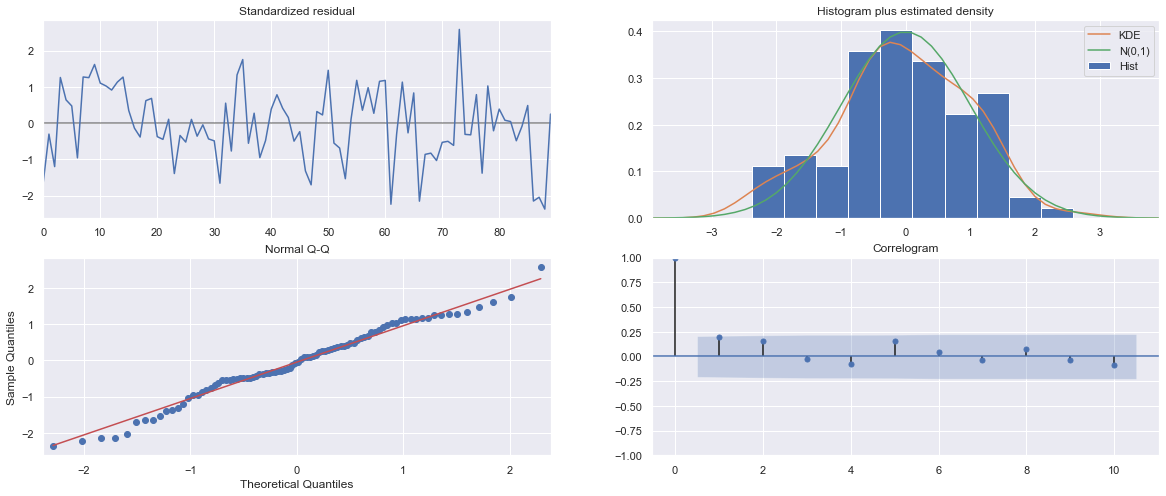

In [41]:
results1.plot_diagnostics()


pred_model2tronc = results1.get_forecast(12)
pred_tronc = pred_model2tronc.predicted_mean
MAE_sarima_model2=np.abs(x_a_prevoir['corrigee']-pred_tronc).mean()
MAE_sarima_model2

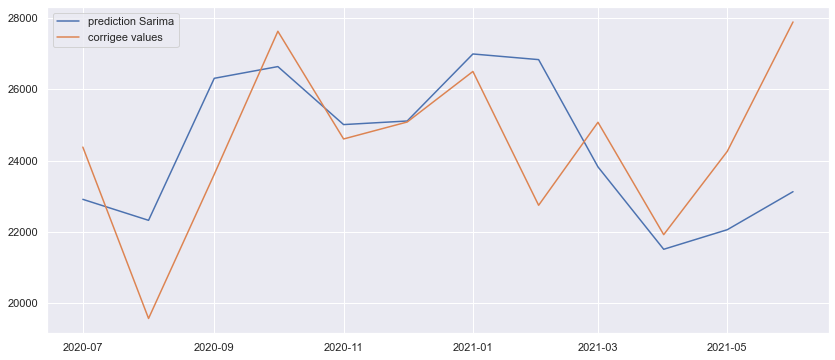

In [42]:
plt.figure(figsize=(14,6))
plt.plot(x_a_prevoir['Mois'],results1.forecast(12), label='prediction Sarima')
plt.plot(x_a_prevoir['Mois'],x_a_prevoir['corrigee'], label='corrigee values')
plt.legend()

In [43]:
x_a_prevoir["sarima"] = results1.forecast(12)
x_a_prevoir

<ipython-input-43-a5bc9cf12b4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_a_prevoir["sarima"] = results1.forecast(12)


,Mois,corrigee,corrigee_desaison,sarima
102,2020-07-01,24379.369648,25595.585095,22912.451604
103,2020-08-01,19566.655683,22358.807956,22322.980254
104,2020-09-01,23616.245751,22791.899304,26311.412522
105,2020-10-01,27632.092887,25502.731113,26640.475392
106,2020-11-01,24607.817821,24557.629234,25011.680387
107,2020-12-01,25083.847687,24459.077447,25112.318174
108,2021-01-01,26503.566739,25272.381182,26994.673440
109,2021-02-01,22745.573419,23513.240973,26836.067833
110,2021-03-01,25076.357534,23958.993138,23823.557559
111,2021-04-01,21920.749367,22577.396198,21509.844386


In [44]:
serie_corr_df["sarima"] = results1.forecast(114)
serie_corr_df["true_conso"] = df["Conso_totale"].values
serie_corr_df

,Mois,corrigee,corrigee_desaison,sarima,true_conso
0,2012-01-01,28658.247099,27427.061542,22912.451604,51086
1,2012-02-01,25379.995567,26147.663121,22322.980254,54476
2,2012-03-01,28531.236129,27413.871733,26311.412522,43156
3,2012-04-01,24676.820763,25333.467594,26640.475392,40176
4,2012-05-01,26285.898840,26362.343536,25011.680387,35257
...,...,...,...,...,...
109,2021-02-01,22745.573419,23513.240973,22340.581573,43024
110,2021-03-01,25076.357534,23958.993138,26348.365619,43913
111,2021-04-01,21920.749367,22577.396198,26671.666140,37747
112,2021-05-01,24260.368402,24336.813098,25031.899732,35007


In [45]:
df["Conso_totale"].values
serie_corr_df

,Mois,corrigee,corrigee_desaison,sarima,true_conso
0,2012-01-01,28658.247099,27427.061542,22912.451604,51086
1,2012-02-01,25379.995567,26147.663121,22322.980254,54476
2,2012-03-01,28531.236129,27413.871733,26311.412522,43156
3,2012-04-01,24676.820763,25333.467594,26640.475392,40176
4,2012-05-01,26285.898840,26362.343536,25011.680387,35257
...,...,...,...,...,...
109,2021-02-01,22745.573419,23513.240973,22340.581573,43024
110,2021-03-01,25076.357534,23958.993138,26348.365619,43913
111,2021-04-01,21920.749367,22577.396198,26671.666140,37747
112,2021-05-01,24260.368402,24336.813098,25031.899732,35007


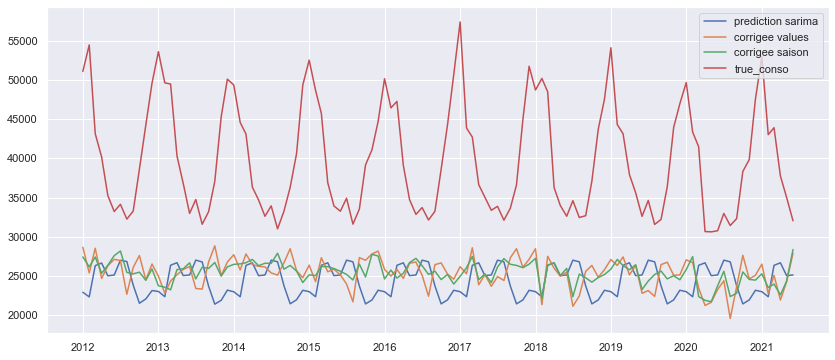

In [46]:
plt.figure(figsize=(14,6))
plt.plot(serie_corr_df['Mois'],results1.forecast(114), label='prediction sarima')
plt.plot(serie_corr_df['Mois'],serie_corr_df['corrigee'], label='corrigee values')
plt.plot(serie_corr_df['Mois'],serie_corr_df['corrigee_desaison'], label='corrigee saison')
plt.plot(serie_corr_df['Mois'],serie_corr_df['true_conso'], label='true_conso')

plt.legend()

In [47]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(x_tronc["corrigee"],
                         test='adf',
                         m=12,
                         seasonal=True,
                         d=0, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1612.744, Time=1.43 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1624.675, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1620.109, Time=0.19 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1620.842, Time=0.19 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1624.150, Time=0.02 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=1612.994, Time=3.14 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=1612.475, Time=1.14 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(2,0,2)(2,1,0)[12] intercept   : AIC=1612.043, Time=2.86 sec
 ARIMA(2,0,2)(2,1,1)[12] intercept   : AIC=1614.018, Time=3.50 sec
 ARIMA(1,0,2)(2,1,0)[12] intercept   : AIC=1622.422, Time=1.56 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=1619.352, Time=1.68 sec
 ARIMA(3,0,2)(2,1,0)[12] intercept   : AIC=1612.643, Time=2.99 sec
 ARIMA(2,0,3)(2,1,0)[12] intercept   : AIC=1612.379, Time=1.68 sec
 ARIMA(1,0,1)(2,1,0)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  102
Model:             SARIMAX(2, 0, 2)x(2, 1, [], 12)   Log Likelihood                -798.192
Date:                             Thu, 31 Mar 2022   AIC                           1610.383
Time:                                     13:50:38   BIC                           1627.882
Sample:                                          0   HQIC                          1617.440
                                             - 102                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1916      0.091      2.107      0.035       0.013       0.370
ar.L2         -0.8603      0.073    -11.761      0.000      -1.004      -0.717
ma.L1         -0.0213      0.043     -0.496      0.620      -0.106       0.063
ma.L2          0.9748      0.118      8.235      0.000       0.743       1.207
ar.S.L12      -0.0659      0.031     -2.136      0.033      -0.126      -0.005
ar.S.L24       0.0417      0.035      1.177      0.239      -0.028       0.111
sigma2      3.273e+06   7.37e+05      4.442      0.000    1.83e+06    4.72e+06
===================================================================================
Ljung-Box (Q):                       44.13   Jarque-Bera (JB):                 1.77
Prob(Q):                              0.30   Prob(JB):                         0.41
Heteroskedasticity (H):               1.98   Skew:                            -0.29
Prob(H) (two-sided):                  0.07   Kurtosis:                         2.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.78e+14. Standard errors may be unstable.
"""

In [48]:
pred_tronc = smodel.predict(12)

MAE_sarima_model_optim=np.abs(x_a_prevoir['corrigee']-pred_tronc).mean()
MAE_sarima_model_optim

1790.724815909164

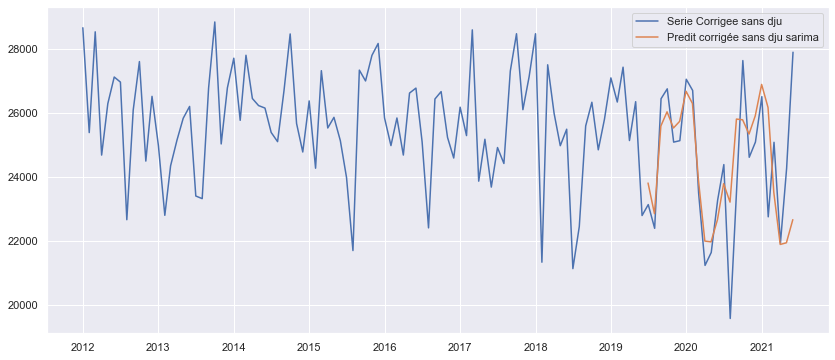

In [49]:
pred_tronc = smodel.predict(24)

plt.figure(figsize=(14,6))
plt.plot(serie_corr_df['Mois'],serie_corr_df['corrigee'], label='Serie Corrigee sans dju')
plt.plot(pd.date_range(serie_corr_df.Mois[len(y)+23],
                       periods=24, freq='M'), pred_tronc, label='Predit corrigée sans dju sarima')
plt.legend()
plt.show()

In [50]:

y= np.asarray(serie_corr_df["corrigee"])
hw = ExponentialSmoothing(y, 
                          seasonal_periods=12, trend=None, 
                          seasonal='add').fit()
hw_pred = hw.forecast(24)

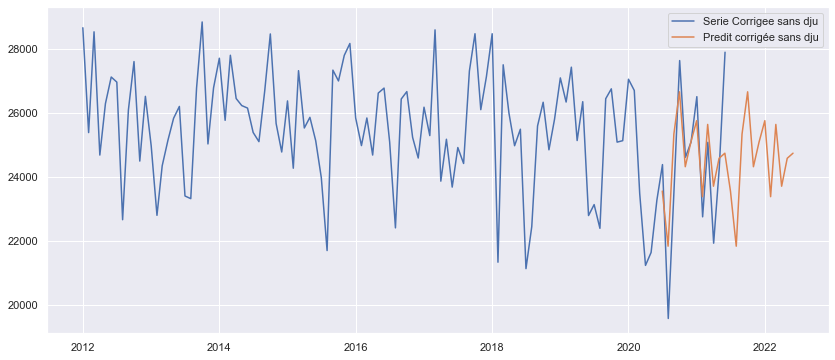

In [51]:
plt.figure(figsize=(14,6))
plt.plot(serie_corr_df['Mois'],serie_corr_df['corrigee'], label='Serie Corrigee sans dju')
plt.plot(pd.date_range(serie_corr_df.Mois[len(y)-13],
                       periods=24, freq='M'), hw_pred, label='Predit corrigée sans dju')
plt.legend()
plt.show()

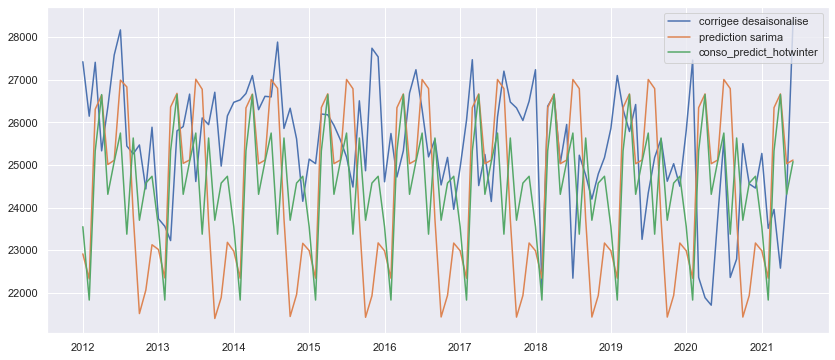

In [52]:
hw_pred = hw.forecast(114)

plt.figure(figsize=(14,6))


plt.plot(serie_corr_df['Mois'],serie_corr_df['corrigee_desaison'], label='corrigee desaisonalise')   

plt.plot(serie_corr_df['Mois'],results1.forecast(114), label='prediction sarima')

plt.plot(serie_corr_df['Mois'], hw_pred, label='conso_predict_hotwinter')

plt.legend()

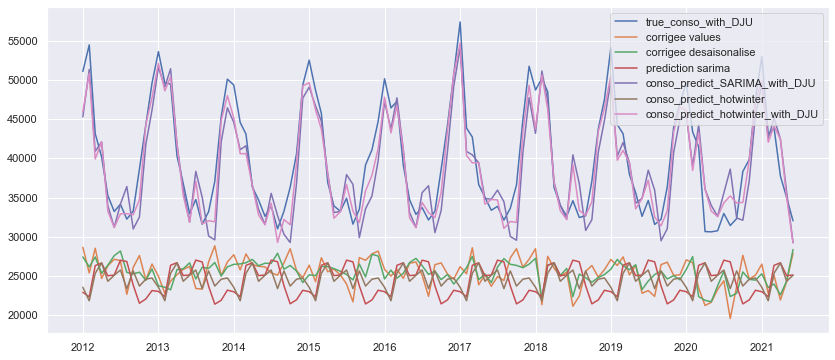

In [53]:
hw_pred = hw.forecast(114)

plt.figure(figsize=(14,6))
plt.plot(serie_corr_df['Mois'],serie_corr_df['true_conso'], label='true_conso_with_DJU')


plt.plot(serie_corr_df['Mois'],serie_corr_df['corrigee'], label='corrigee values')
plt.plot(serie_corr_df['Mois'],serie_corr_df['corrigee_desaison'], label='corrigee desaisonalise')   

plt.plot(serie_corr_df['Mois'],results1.forecast(114), label='prediction sarima')
plt.plot(serie_corr_df['Mois'],(results1.forecast(114) + (df["dju"] * 66.58481908)), label='conso_predict_SARIMA_with_DJU')

plt.plot(serie_corr_df['Mois'], hw_pred, label='conso_predict_hotwinter')
plt.plot(serie_corr_df['Mois'], hw_pred+ (df["dju"] * 66.58481908), label='conso_predict_hotwinter_with_DJU')

plt.legend()

In [54]:
print("MAE without DJU")

print("hotwinter mean: " + str(abs(serie_corr_df['corrigee_desaison'] - hw_pred).mean()))

print("hotwinter sum: " + str(abs(serie_corr_df['corrigee_desaison'] - hw_pred).sum()))

print("sarima mean: " + str(abs(serie_corr_df['corrigee_desaison']- results1.forecast(114)).mean()))

print("sarima sum: " + str(abs(serie_corr_df['corrigee_desaison'] - results1.forecast(114)).sum()))

print("MAE with DJU")

print("hotwinter mean: " + str(abs(serie_corr_df['true_conso'] - ((hw_pred + (df["dju"] * 66.58481908)).reset_index()["dju"])).mean()))

print("hotwinter sum: " + str(abs(serie_corr_df['true_conso'] - ((hw_pred + (df["dju"] * 66.58481908)).reset_index()["dju"])).sum()))

print("sarima mean: " + str(abs(serie_corr_df['true_conso'] - ((results1.forecast(114) + (df["dju"] * 66.58481908)).reset_index()["dju"])).mean()))

print("sarima sum: " + str(abs(serie_corr_df['true_conso'] - ((results1.forecast(114) + (df["dju"] * 66.58481908)).reset_index()["dju"])).sum()))

MAE without DJU
hotwinter mean: 1672.1119614671743
hotwinter sum: 190620.7636072579
sarima mean: 2195.2278744521554
sarima sum: 250255.97768754567
MAE with DJU
hotwinter mean: 1978.5159703269765
hotwinter sum: 225550.8206172753
sarima mean: 2852.4598955022316
sarima sum: 325180.4280872545


In [55]:
serie_corr_df['true_conso'] - ((hw_pred + (df["dju"] * 66.58481908)).reset_index()["dju"])

(serie_corr_df['true_conso'] - ((results1.forecast(114) + (df["dju"] * 66.58481908)).reset_index()["dju"]))

0      5801.049185
1      3128.697109
2      2255.853617
3     -1925.470382
4      1296.319928
          ...     
109     454.950391
110   -1225.601563
111   -4711.926744
112    -745.055604
113    2787.190801
Length: 114, dtype: float64

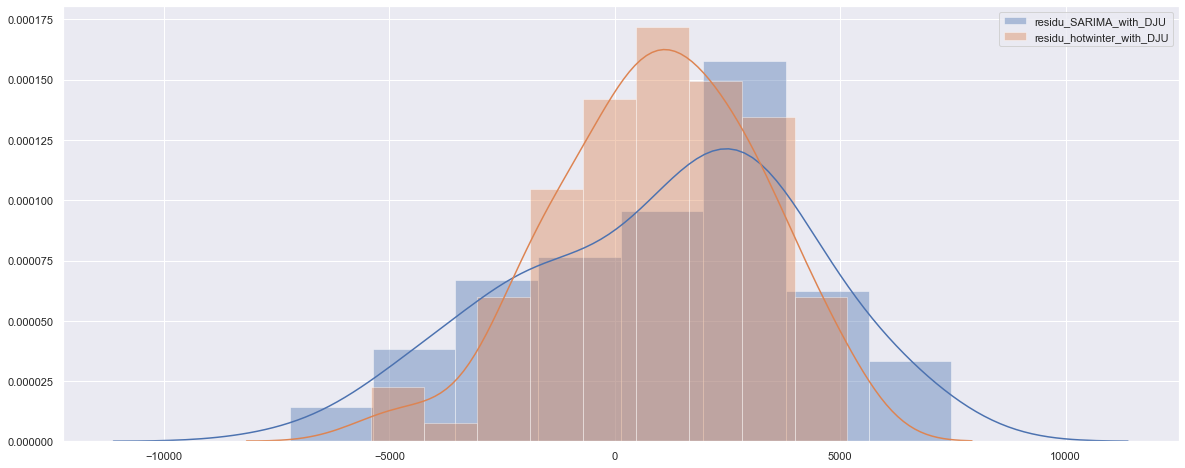

In [56]:
residuals_sarima = (serie_corr_df['true_conso'] - ((results1.forecast(114) + (df["dju"] * 66.58481908)).reset_index()["dju"]))
residuals_hotwinter = ((serie_corr_df['true_conso'] - ((hw_pred + (df["dju"] * 66.58481908)).reset_index()["dju"])))


sns.distplot(residuals_sarima, label='residu_SARIMA_with_DJU')
sns.distplot(residuals_hotwinter, label='residu_hotwinter_with_DJU')

plt.legend()

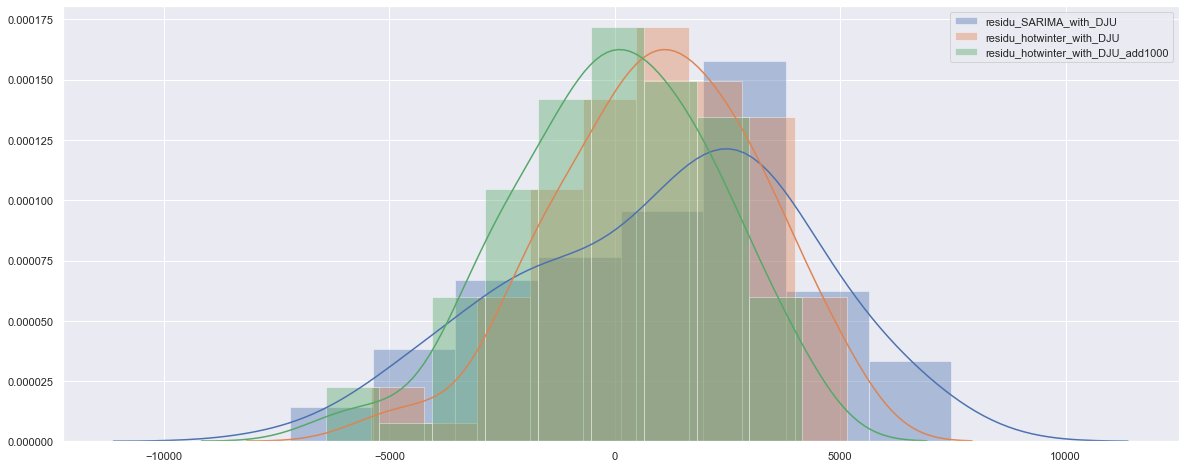

In [57]:
residuals_sarima = (serie_corr_df['true_conso'] - ((results1.forecast(114) + (df["dju"] * 66.58481908)).reset_index()["dju"]))
residuals_hotwinter = ((serie_corr_df['true_conso'] - ((hw_pred + (df["dju"] * 66.58481908)).reset_index()["dju"])))
residuals_hotwinter_add2500 = ((serie_corr_df['true_conso'] - ((hw_pred + (df["dju"] * 66.58481908)).reset_index()["dju"]+1000)))


sns.distplot(residuals_sarima, label='residu_SARIMA_with_DJU')
sns.distplot(residuals_hotwinter, label='residu_hotwinter_with_DJU')
sns.distplot(residuals_hotwinter_add2500, label='residu_hotwinter_with_DJU_add1000')

plt.legend()


In [58]:
print("hotwinter : " + str((serie_corr_df['true_conso'] - ((hw_pred + (df["dju"] * 66.58481908)+947.8584)).reset_index()["dju"]).mean()))


hotwinter : 1.9915667156997268e-05


In [59]:
print("hotwinter mean: " + str(abs(serie_corr_df['true_conso'] - ((hw_pred + (df["dju"] * 66.58481908)).reset_index()["dju"])).mean()))
print("hotwinter how many add mean: " + str((serie_corr_df['true_conso'] - ((hw_pred + (df["dju"] * 66.58481908)).reset_index()["dju"])).mean()))
print("hotwinter add 947.8584 mean: " + str(abs(serie_corr_df['true_conso'] - ((hw_pred + (df["dju"] * 66.58481908)).reset_index()["dju"]+947.8584)).mean()))


hotwinter mean: 1978.5159703269765
hotwinter how many add mean: 947.8584199156652
hotwinter add 947.8584 mean: 1792.0928090015457


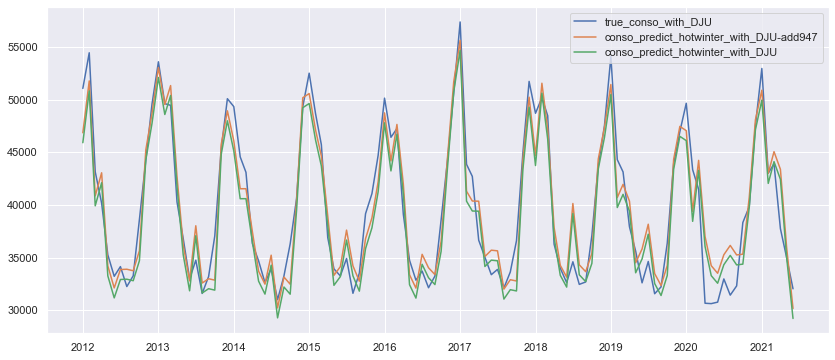

In [60]:
hw_pred = hw.forecast(114)

plt.figure(figsize=(14,6))

plt.plot(serie_corr_df['Mois'],serie_corr_df['true_conso'], label='true_conso_with_DJU')
plt.plot(serie_corr_df['Mois'], hw_pred+ (df["dju"] * 66.58481908)+947.8584, label='conso_predict_hotwinter_with_DJU-add947')
plt.plot(serie_corr_df['Mois'], hw_pred+ (df["dju"] * 66.58481908), label='conso_predict_hotwinter_with_DJU')


plt.legend()

In [61]:
serie_corr_df

,Mois,corrigee,corrigee_desaison,sarima,true_conso
0,2012-01-01,28658.247099,27427.061542,22912.451604,51086
1,2012-02-01,25379.995567,26147.663121,22322.980254,54476
2,2012-03-01,28531.236129,27413.871733,26311.412522,43156
3,2012-04-01,24676.820763,25333.467594,26640.475392,40176
4,2012-05-01,26285.898840,26362.343536,25011.680387,35257
...,...,...,...,...,...
109,2021-02-01,22745.573419,23513.240973,22340.581573,43024
110,2021-03-01,25076.357534,23958.993138,26348.365619,43913
111,2021-04-01,21920.749367,22577.396198,26671.666140,37747
112,2021-05-01,24260.368402,24336.813098,25031.899732,35007
